# Лабораторная работа № 6

№ 1. Предположим, что вы собираетесь в турпоход. У вас есть рюкзак, емкость которого
составляет 6 фунтов, и список предметов, которые вы можете положить с собой в рюкзак.
У каждого предмета есть вес и ценность. Чем выше ценность, тем важнее для вас предмет.
Нарисуйте и вручную заполните таблицу, которая даст оптимальный набор предметов для
похода и общую ценность получившегося рюкзака. Ориентируйтесь на алгоритм
динамического программирования, описанный в лекции.
Список предметов возьмите согласно вашему варианту.

Вариант 4.
1. вода, 2 фунта, 6;
2. книга, 1 фунт, 3;
3. еда, 4 фунта, 9;
4. куртка, 1 фунт, 5;
5. камера, 3 фунта, 6

| Предметы (ценность) | 1 | 2 | 3 | 4 | 5 | 6 | Вес |
| ------ | ------ | ------ | ------ | ------ | ------ | ------ | ------ |
| Вода (6) | 0 | 6 | 6 | 6 | 6 | 6 | 2 |
| Книга (3) | 3 | 6 | 9 | 9 | 9 | 9 | 1 |
| Еда (9) | 3 | 6 | 9 | 9 | 12 | 15 | 4 |
| Куртка (5) | 5 | 8 | 11 | 14 | 14 | 17 | 1 |
| Камера (6) | 5 | 8 | 11 | 14 | 14 | 17 | 3 |

№ 2. Напишите программу, которая моделирует задачу о рюкзаке. Пользователь вводит объем
рюкзака и список предметов с указанием их веса и ценности. Вам необходимо подобрать
набор предметов максимальной ценности, которые поместятся в рюкзаке. Реализуйте три
варианта решения этой задачи:

1. Полный перебор
2. Жадный алгоритм
3. Динамическое программирование

Укажите вычислительная сложность (в O-нотации) для каждого алгоритма. Постройте
графики возрастания времени выполнения алгоритмов при увеличении входных данных.
Приведите примеры входных данных, когда жадный алгоритм дает оптимальное решение
и когда дает неоптимальное решение.

Жадный алгоритм:
Ценность: 20
Выбранные предметы: ['камера', 'книга', 'еда', 'куртка']

Полный перебор:
Оптимальная ценность: 20
Выбранные предметы: ['книга', 'еда', 'куртка', 'камера']

Динамическое программирование:
Оптимальная ценность: 20
Выбранные предметы: ['камера', 'куртка', 'еда', 'книга']


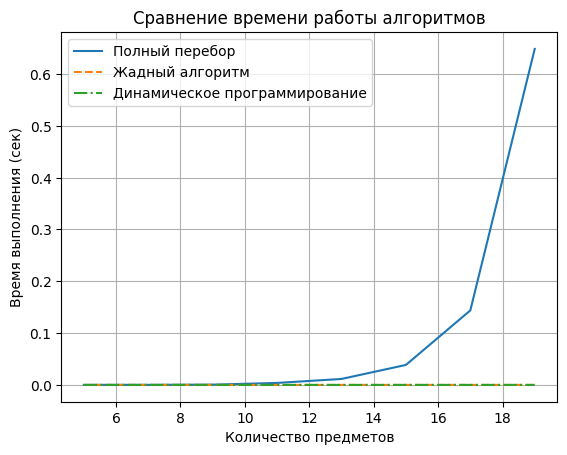

Жадный алгоритм:
Ценность: 16
Выбранные предметы: ['Камера', 'Еда']

Полный перебор:
Оптимальная ценность: 22
Выбранные предметы: ['Еда', 'Куртка']


In [ ]:
import random
import time
import matplotlib.pyplot as plt

def brute_force(items, capacity):
    best_combination = []
    n = len(items)
    max_value = 0

    for i in range(1 << n):
        current_combination = []
        current_weight = 0
        current_value = 0

        for j in range(n):
            if i & (1 << j):
                current_weight += items[j][1]
                current_value += items[j][2]
                current_combination.append(items[j])

        if current_weight <= capacity and current_value > max_value:
            max_value = current_value
            best_combination = current_combination

    return best_combination

def greedy(items, capacity):
    items = sorted(items, key = lambda x: x[2]/x[1], reverse=True)
    best_combination = []

    for item in items:
        if item[1] <= capacity:
            capacity -= item[1]
            best_combination.append(item)

    return best_combination

def dynamic_programming(items, capacity):
    n = len(items)
    dp = [[0 for _ in range(capacity + 1)] for _ in range(n + 1)]

    for i in range(1, n + 1):
        for w in range(capacity + 1):
            if items[i-1][1] <= w:
                dp[i][w] = max(dp[i-1][w], dp[i-1][w - items[i-1][1]] + items[i-1][2])
            else:
                dp[i][w] = dp[i-1][w]

    w = capacity
    best_combination = []
    for i in range(n, 0, -1):
        if dp[i][w] != dp[i-1][w]:
            best_combination.append(items[i-1])
            w -= items[i-1][1]

    return best_combination

items = [
    ("вода", 3, 5, 0.66),
    ("книга", 1, 3, 3),
    ("еда", 2, 6, 4),
    ("куртка", 2, 5, 2.5),
    ("камера", 1, 6, 6)
]
capacity = 6

greedy_items = greedy(items, capacity)
print("Жадный алгоритм:")
print("Ценность:", sum(item[2] for item in greedy_items))
print("Выбранные предметы:", [item[0] for item in greedy_items])

best_items = brute_force(items, capacity)
print("\nПолный перебор:")
print("Оптимальная ценность:", sum(item[2] for item in best_items))
print("Выбранные предметы:", [item[0] for item in best_items])

dp_items = dynamic_programming(items, capacity)
print("\nДинамическое программирование:")
print("Оптимальная ценность:", sum(item[2] for item in dp_items))
print("Выбранные предметы:", [item[0] for item in dp_items])

def measure_time(func):
    sizes = list(range(5, 21, 2))
    times = []
    for n in sizes:
        test_items = [(i, i % 5 + 1, i % 10 + 1, (i % 10 + 1)/(i % 5 + 1)) for i in range(n)]
        capacity_test = 20
        start = time.time()
        func(test_items, capacity_test)
        end = time.time()
        times.append(end - start)
    return sizes, times

sizes, times_bf = measure_time(brute_force)
_, times_greedy = measure_time(greedy)
_, times_dp = measure_time(dynamic_programming)

plt.figure()
plt.plot(sizes, times_bf, label="Полный перебор")
plt.plot(sizes, times_greedy, label="Жадный алгоритм", linestyle='--')
plt.plot(sizes, times_dp, label="Динамическое программирование", linestyle='-.')
plt.xlabel("Количество предметов")
plt.ylabel("Время выполнения (сек)")
plt.title("Сравнение времени работы алгоритмов")
plt.legend()
plt.grid(True)
plt.show()

# Неоптимальное решение
items = [
    ("Камера", 1, 6, 6),
    ("Еда", 2, 10, 5),
    ("Куртка", 3, 12, 4)
]
capacity = 5

greedy_items = greedy(items, capacity)
print("Жадный алгоритм:")
print("Ценность:", sum(item[2] for item in greedy_items))
print("Выбранные предметы:", [item[0] for item in greedy_items])

best_items = brute_force(items, capacity)
print("\nПолный перебор:")
print("Оптимальная ценность:", sum(item[2] for item in best_items))
print("Выбранные предметы:", [item[0] for item in best_items])

№ 3. Нарисуйте и вручную заполните таблицу для вычисления самой длинной общей подстроки
между строками blue и clue. Ориентируйтесь на алгоритм динамического
программирования, описанный в лекции.

|  | b | l | u | e |
| ------ | ------ |---|---| ------ |
| c | 0 | 0 | 0 | 0 |
| l | 0 | 1 | 0 | 0 |
| u | 0 | 0 | 2 | 0 |
| e | 0 | 0 | 0 | 1 |

№ 4. Напишите программу, реализующую алгоритм нахождения самой длинной общей подстроки из лекции. Пользователь вводит слово с ошибкой и далее список похожих слов. Ваша программа должна вывести самое похожее слово согласно данному алгоритму

In [6]:
def substring(word_a, word_b):
    n = len(word_a)
    m = len(word_b)
    cell = [[0] * (m + 1) for _ in range(n + 1)]
    max_len = 0

    for i in range(len(word_a)):
        for j in range(len(word_b)):
            if word_a[i] == word_b[j]:
                cell[i][j] = cell [i - 1][j - 1] + 1
                max_len = max(max_len, cell[i][j])
            else:
                cell[i][j] = 0
    return max_len

str = input("Введите ваше слово")
same_str =[]
for i in range(0,3):
    same_str.append(input("Введите похожие слова"))

print(str)
print(same_str)

res = {}
for i in same_str:
    res[i] = substring(i,str)

best_word = max(res, key=res.get)
best_value = res[best_word]

print("Максимальная подстрока:")
print(best_word, "→", best_value)

привет
['ривет', 'пока', 'привет']
Максимальная подстрока:
привет → 6


№ 5. Напишите программу, реализующую алгоритм нахождения самой длинной общей подпоследовательности из лекции. Пользователь вводит слово с ошибкой и далее список похожих слов. Ваша программа должна вывести самое похожее слово согласно данному алгоритму.

In [7]:
def subsequence(word_a, word_b):
    n = len(word_a)
    m = len(word_b)
    cell = [[0] * (m + 1) for _ in range(n + 1)]
    max_len = 0

    for i in range(len(word_a)):
        for j in range(len(word_b)):
            if word_a[i] == word_b[j]:
                cell[i][j] = cell [i - 1][j - 1] + 1
                max_len = max(max_len, cell[i][j])
            else:
                cell[i][j] = max(cell[i - 1][j], cell[i][j - 1])
    return max_len

str = input("Введите ваше слово")
same_str =[]
for i in range(0,3):
    same_str.append(input("Введите похожие слова"))

print(str)
print(same_str)

res = {}
for i in same_str:
    res[i] = subsequence(i,str)

best_word = max(res, key=res.get)
best_value = res[best_word]

print("Максимальная подпоследовательность:")
print(best_word, "→", best_value)

привет
['мир', 'пока', 'чмок']
Максимальная подпоследовательность:
мир → 1


№ 6. Имеется n предметов различных размеров (от 0.1 до 1.0). Есть неограниченное количество одинаковых ящиков вместимостью 1.0. Необходимо разложить все n предметов в минимальное количество ящиков. Напишите программу, реализующую 4 жадных стратегии раскладки предметов по ящикам:

1. Первый подходящий ящик. Ящики просматриваются поочередно пока не найдется ящик, в котором достаточно свободного места для упаковки очередного предмета. Если такого ящика нет, то предмет кладется в новый ящик. Например, упаковка предметов размерами (0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5) пройдет следующим образом: первый ящик — [0.5, 0.3, 0.1], второй — [0.7, 0.2], третий — [0.9], четвертый — [0.6, 0.4], пятый — [0.8], шестой — [0.5]. Т.е. ответом будет 6 ящиков.

In [19]:
package = [0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5]

def first(package):
    lim = 1
    res = []

    while package:
        current_sum = 0
        temp = []
        i = 0
        
        while i < len(package):
            if package[i] <= (lim - current_sum):
                temp.append(package[i])
                current_sum += package[i]
                package.pop(i)
            else:
                i += 1

        res.append(temp)

    return res

print(first(package))

[[0.5, 0.3, 0.1], [0.7, 0.2], [0.9], [0.6, 0.4], [0.8], [0.5]]


2. Наиболее подходящий ящик. Выбирается ящик, в котором останется как можно меньше места после помещения туда очередного предмета. Укладка в новый ящик применяется только в том случае, если очередной предмет не помещается ни в какой из имеющихся ящиков. Например, упаковка предметов размерами (0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5) пройдет следующим образом: первый ящик — [0.5, 0.5], второй — [0.7, 0.3], третий — [0.9, 0.1], четвертый — [0.6, 0.4], пятый — [0.8, 0.2]. Т.е. ответом будет 5 ящиков.

In [20]:
package = [0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5]

def second(package):
    lim = 1
    res = []

    while package:
        item = package.pop(0)
        best_box_index = None
        min_space_left = lim + 1

        i = 0
        while i < len(res):
            current_sum = sum(res[i])

            if current_sum + item <= lim:
                space_left = lim - (current_sum + item)

                if space_left < min_space_left:
                    min_space_left = space_left
                    best_box_index = i

            i += 1

        if best_box_index is not None:
            res[best_box_index].append(item)
        else:
            res.append([item])

    return res


print(second(package))

[[0.5, 0.5], [0.7, 0.3], [0.9, 0.1], [0.6, 0.4], [0.8, 0.2]]


3. Следующий подходящий ящик. Мы продолжаем укладку каждого ящика до тех пор, пока очередной предмет в него помещается. Если предмет не влезает в ящик, то мы берем новый ящик, а к ранее уложенным ящикам уже не возвращаемся. Например, упаковка предметов размерами (0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5) пройдет следующим образом: первый ящик — [0.5], второй — [0.7, 0.3], третий — [0.9], четвертый — [0.6], пятый — [0.8, 0.1], шестой — [0.4, 0.2], седьмой — [0.5]. Т.е. ответом будет 7 ящиков.

In [21]:
package = [0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5]

def third(package):
    lim = 1
    boxes = []
    current_box = []
    current_fill = 0.0

    while package:
        item = package.pop(0)

        if current_fill  + item <= lim:
            current_box.append(item)
            current_fill = current_fill + item
        else:
            boxes.append(current_box)
            current_box= [item]
            current_fill = item

    if current_box:
        boxes.append(current_box)

    return boxes

print(third(package))

[[0.5], [0.7, 0.3], [0.9], [0.6], [0.8, 0.1], [0.4, 0.2], [0.5]]


4. Наименее подходящий ящик. Выбирается ящик, в котором останется как можно больше места после помещения туда очередного предмета. Укладка в новый ящик применяется только в том случае, если очередной предмет не помещается ни в какой из имеющихся ящиков. Например, упаковка предметов размерами (0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5) пройдет следующим образом: первый ящик — [0.5, 0.3], второй — [0.7], третий — [0.9], четвертый — [0.6, 0.1], пятый — [0.8], шестой — [0.4, 0.2], седьмой — [0.5]. Т.е. ответом будет 7 ящиков.

In [22]:
package = [0.5, 0.7, 0.3, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.5]

def fourth(package):
    lim = 1
    res = []

    while package:
        item = package.pop(0)
        best_box_index = None
        max_space_left = - 1

        i = 0
        while i < len(res):
            current_sum = sum(res[i])

            if current_sum + item <= lim:
                space_left = lim - (current_sum + item)

                if space_left > max_space_left:
                    max_space_left = space_left
                    best_box_index = i

            i += 1

        if best_box_index is not None:
            res[best_box_index].append(item)
        else:
            res.append([item])

    return res


print(fourth(package))

[[0.5, 0.3], [0.7], [0.9], [0.6, 0.1], [0.8], [0.4, 0.2], [0.5]]


Сгенерируйте случайные наборы предметов (размером от 0.1 до 0.9) в количестве 50, 100, 200 и 500. Осуществите на каждом из наборов проверку всех четырех стратегий и посмотрите, какая из них приводит к меньшему числу ящиков. В отчете приведите ваши результаты в виде таблицы.

In [25]:
import random


sizes = [50, 100, 200, 500]
results = []

for n in sizes:
    items = [round(random.uniform(0.1, 0.9), 2) for _ in range(n)]
    res1 = len(first(items.copy()))
    res2 = len(second(items.copy()))
    res3 = len(third(items.copy()))
    res4 = len(fourth(items.copy()))

    results.append([n, res1, res2, res3, res4])

print()
print("Результаты упаковки")
print("=" * 85)
print(f"{'Кол-во предметов':<18}"
      f"{'Первый':<10}"
      f"{'Наиболее подходящий':<24}"
      f"{'Следующий':<14}"
      f"{'Наименее подходящий':<22}")
print("-" * 85)

for n, r1, r2, r3, r4 in results:
    print(f"{n:<18}"
          f"{r1:<10}"
          f"{r2:<24}"
          f"{r3:<14}"
          f"{r4:<22}")

print("=" * 85)


Результаты упаковки
Кол-во предметов  Первый    Наиболее подходящий     Следующий     Наименее подходящий   
-------------------------------------------------------------------------------------
50                27        27                      31            29                    
100               58        58                      69            61                    
200               110       109                     138           119                   
500               257       256                     330           286                   


№ 7. Есть купюры и монеты номиналами: 1, 3, 4, 10, 50, 100. В банкомате неограниченное количество купюр и монет каждого номинала. Мы хотим снять со счета n рублей. Нужно вывести на экран минимальный набор купюр и монет, который может выдать банкомат, чтобы сумма получилась ровно n.

1. Напишите жадный алгоритм решения задачи. Подсказка: выбирайте купюры и монеты по убыванию номинала.
2. Используйте динамическое программирование, чтобы рассчитать минимальное количество требуемых купюр и монет.
3. Приведите пример входных данных, когда жадный алгоритм выдает не оптимальное решение.

In [26]:
def greedy(n):
    coins = [1, 3, 4, 10, 50, 100]
    coins.reverse()
    res = {}
    for i in coins :
        res[i] = n // i
        n = n % i

    return res

print(greedy(15767))

def dinamic(n):
    coins = [1, 3, 4, 10, 50, 100]
    coins.reverse()

    dp = [float('inf')] * (n + 1)
    dp[0] = 0

    for i in range(1, n + 1):
        for coin in coins:
            if i - coin >= 0:
                dp[i] = min(dp[i], dp[i - coin] + 1)

    res = {coin: 0 for coin in coins}
    current = n

    while current > 0:
        for coin in coins:
            if current - coin >= 0 and dp[current] == dp[current - coin] + 1:
                res[coin] += 1
                current -= coin
                break

    return res


print(dinamic(15767))

print(greedy(6))
print(dinamic(6))

{100: 157, 50: 1, 10: 1, 4: 1, 3: 1, 1: 0}
{100: 157, 50: 1, 10: 1, 4: 1, 3: 1, 1: 0}
{100: 0, 50: 0, 10: 0, 4: 1, 3: 0, 1: 2}
{100: 0, 50: 0, 10: 0, 4: 0, 3: 2, 1: 0}


№ 8. Напишите программу, моделирующую работу клиентов с банкоматом. В банкомате есть купюры и монеты номиналами: 1, 3, 4, 10, 50, 100, но, в отличие от предыдущей задачи, их количество конечно. В начале работы программы вы задаете: 

 - количество клиентов 
 - для каждого клиента количество рублей, которые он хочет снять (считаем, что эта сумма всегда корректна и имеется на счету клиента) 
 - изначальное количество купюр и монет в банкомате 

Далее вы по очереди обрабатываете запросы клиентов. Для каждого клиента выведите на экран минимальный набор купюр и монет для его суммы или сообщение о невозможности предоставить данную суммы из-за нехватки купюр и монет. Если минимальный набор найден успешно, то вычтите его из запасов банкомата и выведите на экран получившейся остаток. Проведите несколько запусков программы с разными начальными данными и различными исходами работы с банкоматом.

In [27]:
n = int(input("Введите количество клиентов: "))

req = []
for i in range(n):
    s = int(input(f"Введите сумму для клиента {i + 1}: "))
    req.append(s)

print("Запросы клиентов:", req)

coins = {}
nominals = [1, 3, 4, 10, 50, 100]

for nom in nominals:
    coins[nom] = int(input(f"Введите количество купюр номинала {nom}: "))

print("Начальное состояние банкомата:", coins)

for count in req:
    print("\nКлиент хочет снять:", count)
    b = dinamic(count)
    print("Минимальный набор:", b)

    possible = True
    for key in b:
        if coins[key] < b[key]:
            possible = False
            print(f"Недостаточно купюр номинала {key}")

    if possible:
        for key in b:
            coins[key] -= b[key]

        print("Купюры выданы, обновленное значение банка:", coins)

    else:
        print("Операция отклонена.")

Запросы клиентов: [11234, 324, 423]
Начальное состояние банкомата: {1: 12, 3: 32, 4: 23, 10: 54, 50: 76, 100: 87}

Клиент хочет снять: 11234
Минимальный набор: {100: 112, 50: 0, 10: 3, 4: 1, 3: 0, 1: 0}
Недостаточно купюр номинала 100
Операция отклонена.

Клиент хочет снять: 324
Минимальный набор: {100: 3, 50: 0, 10: 2, 4: 1, 3: 0, 1: 0}
Купюры выданы, обновленное значение банка: {1: 12, 3: 32, 4: 22, 10: 52, 50: 76, 100: 84}

Клиент хочет снять: 423
Минимальный набор: {100: 4, 50: 0, 10: 2, 4: 0, 3: 1, 1: 0}
Купюры выданы, обновленное значение банка: {1: 12, 3: 31, 4: 22, 10: 50, 50: 76, 100: 80}
